<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 7</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dynamics of gating variable in Hodgkin–Huxley model

Consider, e.g., gating variable $n$. The dynamics depends on the opening (closing) rate $\alpha$ ($\beta$).
\begin{align*}
	& \frac{dn}{dt} = \alpha_n(V)(1-n)-\beta_n(V)n \\
	\Rightarrow \quad & \tau_n(V)\frac{dn}{dt} = n_\infty(V)-n
\end{align*}
	where $\displaystyle \tau_n(V) = \frac{1}{\alpha_n(V)+\beta_n(V)}$ and $\displaystyle n_\infty(V)=\frac{\alpha_n(V)}{\alpha_n(V)+\beta_n(V)}$.

For fixed $V$, $n$ approaches $n_\infty(V)$ <span style="color:#a00;">exponentially</span> with time constant $\tau_n(V)$.

The opening and closing rates can be estimated from thermal fluctuation:\begin{equation*}
		\alpha_n(V)=A_\alpha \exp(-qB_\alpha V/k_\mathrm{B}T) = A_\alpha\exp(-B_\alpha V/V_T)
	\end{equation*}
	And, similar for $\beta_n(V)$ with $A_\beta$ and $B_\beta$.

In [2]:
# Empirical values of $A$ and $B$ for $\alpha$ and $\beta$
A_alpha = .82
A_beta = .056
B_alpha = -.04
B_beta = .0125

In [3]:
# Squid giant axon
def hh_alpha_n(v):
    return .01*(v+55)/(1-np.exp(-.1*(v+55)))
def hh_beta_n(v):
    return .125*np.exp(-.0125*(v+65))
def hh_alpha_m(v):
    return .1*(v+40)/(1-np.exp(-.1*(v+40)))
def hh_beta_m(v):
    return 4*np.exp(-.0556*(v+65))
def hh_alpha_h(v):
    return .07*np.exp(-.05*(v+65))
def hh_beta_h(v):
    return 1/(1+np.exp(-.1*(v+35)))

In [4]:
# Rat cortical pyramidal neuron
def nd_alpha_n(v):
    return .02*(v-25)/(1-np.exp(-(v-25)/9))
def nd_beta_n(v):
    return -.002*(v-25)/(1-np.exp((v-25)/9))
def nd_alpha_m(v):
    return .182*(v+35)/(1-np.exp(-(v+35)/9))
def nd_beta_m(v):
    return -0.124*(v+35)/(1-np.exp((v+35)/9))
def nd_alpha_h(v):
    return .25*np.exp(-(v+90)/12)
def nd_beta_h(v):
    return .25*np.exp((v+62)/6)/np.exp((v+90)/12)

In [5]:
vs = np.linspace(-100,0,129)

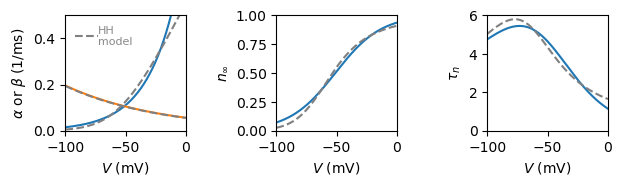

In [6]:
f,aa = plt.subplots(1,3,figsize=(7,1.5),sharex=True)
plt.subplots_adjust(wspace=0.75)

a = aa[0] # Plot $\alpha$ and $\beta$
a.plot(vs,alpha_n:=A_alpha*np.exp(-B_alpha*vs))
a.plot(vs,beta_n:=A_beta*np.exp(-B_beta*vs))
a.plot(vs,hh_alpha_n(vs),'--',color='gray',label='HH\nmodel')
a.plot(vs,hh_beta_n(vs),'--',color='gray')
a.set_ylim(0,0.5)
a.set_xlim(-100,0)
a.set_xlabel('$V$ (mV)')
a.set_ylabel(r'$\alpha$ or $\beta$ (1/ms)')
a.legend(frameon=False,handlelength=2,fontsize=8,handletextpad=0,labelcolor='#888')

a = aa[1] # Plot $n_\infty$
a.plot(vs,1/(1+(A_beta/A_alpha)*np.exp((B_alpha-B_beta)*vs)))
a.plot(vs,hh_alpha_n(vs)/(hh_alpha_n(vs)+hh_beta_n(vs)),'--',color='gray')
a.set_xlabel('$V$ (mV)')
a.set_ylabel(r'$n_\infty$')
a.set_ylim(0,1)

a = aa[2] # Plot $\tau_n$
a.plot(vs,1/(alpha_n+beta_n))
a.plot(vs,1/(hh_alpha_n(vs)+hh_beta_n(vs)),'--',color='gray')
a.set_xlabel('$V$ (mV)')
a.set_ylabel(r'$\tau_n$')
a.set_ylim(0,6)
plt.show()

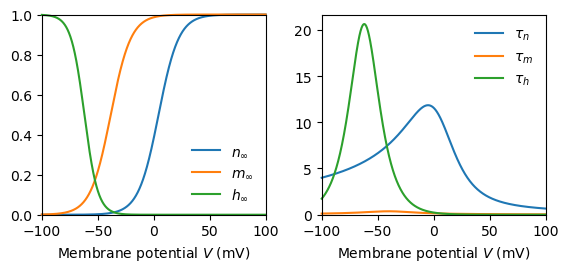

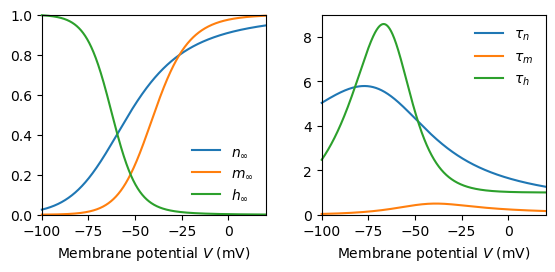

In [7]:
for mset,file,xr in [
    ('nd','cortical_pyra',(-100,100)),
    ('hh','squid_giant_axon',(-100,20))
]:
    f,(a1,a2) = plt.subplots(1,2,figsize=(6.5,2.6))
    plt.subplots_adjust(wspace=0.25)
    vs = np.arange(*xr,0.1)
    for t in ['n','m','h']:
        alpha = globals()[mset+'_alpha_'+t](vs)
        beta = globals()[mset+'_beta_'+t](vs)
        a1.plot(vs,alpha/(alpha+beta),clip_on=False,label=fr'${t}_\infty$')
        a2.plot(vs,1/(alpha+beta),clip_on=False,label=fr'$\tau_{t}$')
    a1.set_xlim(xr)
    a1.set_ylim(0,1)
    a1.set_xlabel('Membrane potential $V$ (mV)')
    a1.legend(frameon=False)
    a2.set_xlim(xr)
    a2.set_ylim(0,None)
    a2.set_xlabel('Membrane potential $V$ (mV)')
    a2.legend(frameon=False)
    plt.show()

In [8]:
# Additional HH parameters
hh_E_Na,hh_g_Na = 50,1.2
hh_E_K,hh_g_K = -77,0.36
hh_E_L,hh_g_L = -54.387,0.003
hh_cm = 0.1 # Membrane capcitance, 0.1 μF/mm^2

In [9]:
# Dynamics of Hodgkin-Huxley model
def hh_f(t,y):
    [V,n,m,h] = y
    return np.array([
        (hh_g_L*(hh_E_L-V)+hh_g_K*n**4*(hh_E_K-V)+hh_g_Na*m**3*h*(hh_E_Na-V)+hh_ie(t))/hh_cm,
        hh_alpha_n(V)*(1-n)-hh_beta_n(V)*n,
        hh_alpha_m(V)*(1-m)-hh_beta_m(V)*m,
        hh_alpha_h(V)*(1-h)-hh_beta_h(V)*h
    ])

In [10]:
# Integrators with explicit time dependency
def euler_step(t,y,f,dt):
    dyt = f(t,y)
    return y+dt*dyt

def runge_kutta(t,y,f,dt):
    k1 = f(t,y)
    k2 = f(t+dt/2,y+k1*dt/2)
    k3 = f(t+dt/2,y+k2*dt/2)
    k4 = f(t+dt,y+k3*dt)
    return y+dt*(k1+2*(k2+k3)+k4)/6

## Example protocol
We drive the Hodgkin–Huxley neurons with a colored noise stimulus, which is generated from a white normally-distributed noise using a Gaussian window filter.

In [11]:
T = 1000 # total time
dt = 0.1 # time between frames
nt = int(T/dt) # number of time frames
ts = np.arange(nt)*dt # time frames
y0 = np.array([-65,.318,.053,.596]) # Initial condition, chosen to be close to the equilibrium when $I_e=0$
# Some correlated random input for testing
wr = np.arange(-10,10,dt)
ww = np.exp(-wr**2/5) # Gaussian filter
ww /= np.sum(ww) # Normalize
rng = np.random.default_rng(123)
ii = np.convolve(np.convolve( # Convolve twice
    rng.normal(size=nt+1),ww,mode='same' # Provide the input at $t=T$ for Runge-Kutta
),ww,mode='same')*.3+.3 # Rescale it a bit

In [12]:
#hh_ie = lambda t:0 # If you want to turn off the external input current
hh_ie = lambda t:ii[int(t/dt)] # Lookup external input current

In [13]:
# This appends a list in a for loop
y = y0
ys = []
for i in range(nt):
    y = euler_step(ts[i],y,hh_f,dt)
    ys.append(y)
[Vs,ns,ms,hs] = (rslt_euler:=np.array(ys).T) # Convert to numpy.array

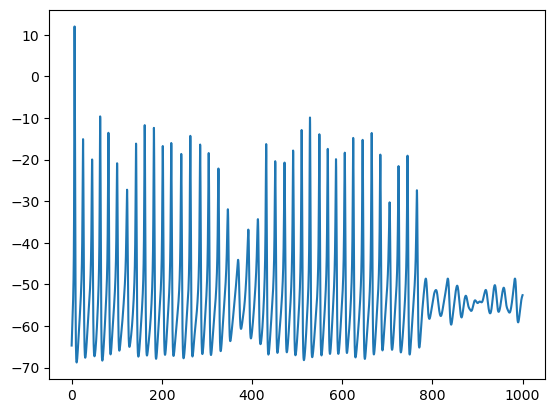

In [14]:
# Show membrane potential
plt.plot(ts,Vs)
plt.show()

In [15]:
# Here we use list comprehension and RK4 integrator
y = y0
ys = [(y:=runge_kutta(ts[i],y,hh_f,dt)) for i in range(nt)]
[Vs,ns,ms,hs] = (rslt_rk4:=np.array(ys).T)

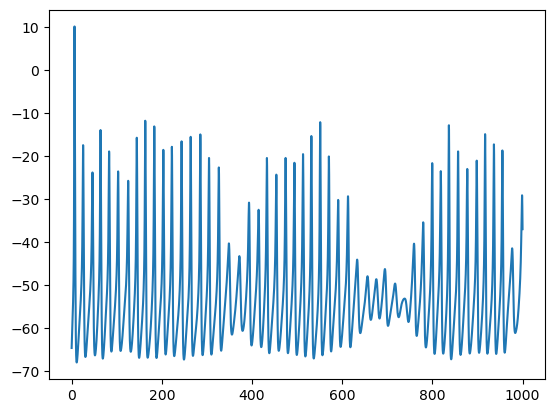

In [16]:
# Show membrane potential
plt.plot(ts,Vs)
plt.show()

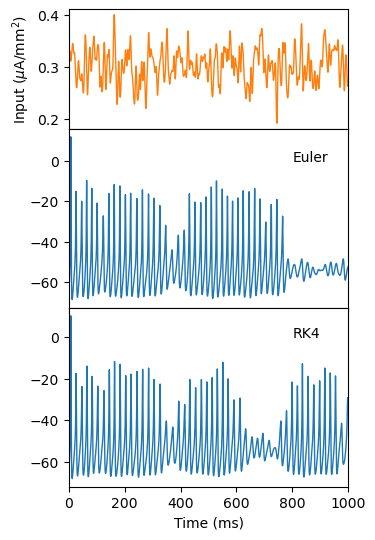

In [17]:
f,aa = plt.subplots(
    3,figsize=(3.6,6.2),sharex=True,
    gridspec_kw={'height_ratios':[2,3,3]}
)
plt.subplots_adjust(hspace=0)
aa[0].plot(ts,ii[:-1],color='C1',lw=1)
aa[0].set_ylabel('Input ($μ$A/mm$^2$)')
aa[1].plot(ts,rslt_euler[0],lw=1)
aa[1].text(800,0,'Euler')
aa[2].plot(ts,rslt_rk4[0],lw=1)
aa[2].text(800,0,'RK4')
plt.xlim(0,1000)
plt.xlabel('Time (ms)')
plt.show()

## Euler exponential integral
For ODE \begin{equation}\frac{dy}{dt} = f(t,y),\end{equation} assume we can refactor $f$ into \begin{equation}f = A-By,\end{equation} where $A$ and $B$ vary slowly in time comparing to the dynamics of $y$. 

In [18]:
def euler_step(t,y,f,dt):
    dyt = f(t,y)
    return y+dt*dyt

# This should be equivilent to the previous one
def euler_step_AB(t,y,A,B,dt):
    dyt = A(t,y)-B(t,y)*y
    return y+dt*dyt

def euler_step_ABi(t,y,A,B,dt):
    yinf = A(t,y)/(By:=B(t,y))
    return yinf+(y-yinf)*np.exp(-dt*By)

def euler_step_exp(t,y,yinf,tau,dt):
    yf = yinf(t,y)
    return yf+(y-yf)*np.exp(-dt/tau(t,y))

### Separate the constant and linear term of $f$ and spell out $A$ and $B$

In [19]:
def hh_A(t,y):
    [V,n,m,h] = y
    return np.array([
        (hh_g_L*hh_E_L+hh_g_K*n**4*hh_E_K+hh_g_Na*m**3*h*hh_E_Na+hh_ie(t))/hh_cm,
        hh_alpha_n(V),
        hh_alpha_m(V),
        hh_alpha_h(V)
    ])
def hh_B(t,y):
    [V,n,m,h] = y
    return np.array([
        (hh_g_L+hh_g_K*n**4+hh_g_Na*m**3*h)/hh_cm,
        hh_alpha_n(V)+hh_beta_n(V),
        hh_alpha_m(V)+hh_beta_m(V),
        hh_alpha_h(V)+hh_beta_h(V)
    ])

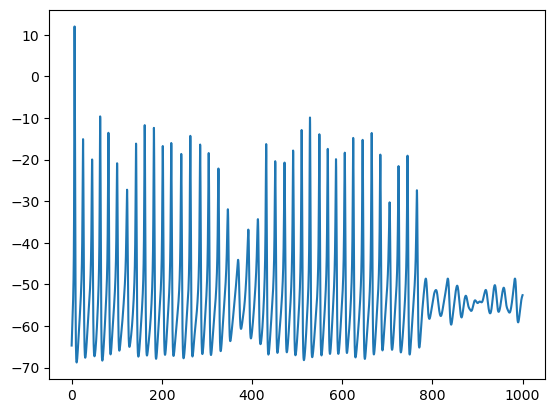

In [20]:
# Repeat using `euler_step_AB`, which produces the same results as `euler_step`
# Here we need to supply the `A` and `B` argment to the integrator
y = y0
ys = [(y:=euler_step_AB(ts[i],y,hh_A,hh_B,dt)) for i in range(nt)]
[Vs,ns,ms,hs] = (rslt_AB:=np.array(ys).T)
plt.plot(ts,Vs)
plt.show()

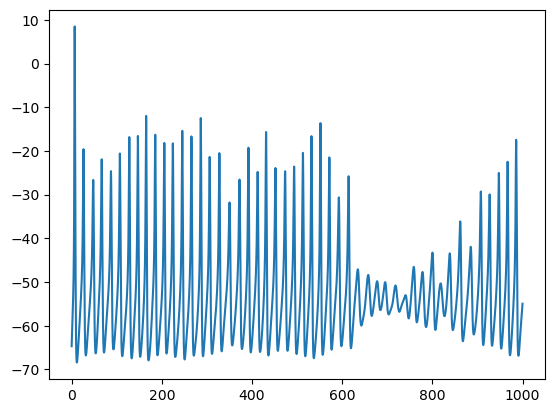

In [21]:
# Using `A`, `B` with the integrated Euler step
y = y0
ys = [(y:=euler_step_ABi(ts[i],y,hh_A,hh_B,dt)) for i in range(nt)]
[Vs,ns,ms,hs] = (rslt_ABi:=np.array(ys).T)
plt.plot(ts,Vs)
plt.show()

## Packaging Hodgkin–Huxley model in a class

In [22]:
class HodgkinHuxley: # default to Dayan-Abbott version
    def __init__(
        self,
        E_Na=50,g_Na=1.2,
        E_K=-77,g_K=0.36,
        E_L=-54.387,g_L=0.003,
        cm=0.1,
        alpha_n=lambda v:.01*(v+55)/(1-np.exp(-.1*(v+55))),
         beta_n=lambda v:.125*np.exp(-.0125*(v+65)),
        alpha_m=lambda v:.1*(v+40)/(1-np.exp(-.1*(v+40))),
         beta_m=lambda v:4*np.exp(-.0556*(v+65)),
        alpha_h=lambda v:.07*np.exp(-.05*(v+65)),
         beta_h=lambda v:1/(1+np.exp(-.1*(v+35)))
    ):
        self.E_Na = E_Na
        self.g_Na = g_Na
        self.E_K = E_K
        self.g_K = g_K
        self.E_L = E_L
        self.g_L = g_L
        self.cm = cm
        self.alpha_n = alpha_n
        self.beta_n = beta_n
        self.alpha_m = alpha_m
        self.beta_m = beta_m
        self.alpha_h = alpha_h
        self.beta_h = beta_h
        self.ie = lambda t:0
    def f(self,t,y): # Slope of the HH dynamics
        [V,n,m,h] = y
        return np.array([
            (self.g_L*(self.E_L-V)+
             self.g_K*n**4*(self.E_K-V)+
             self.g_Na*m**3*h*(self.E_Na-V)+
             self.ie(t))/self.cm,
            self.alpha_n(V)*(1-n)-self.beta_n(V)*n,
            self.alpha_m(V)*(1-m)-self.beta_m(V)*m,
            self.alpha_h(V)*(1-h)-self.beta_h(V)*h
        ])
    def A(self,t,y):
        [V,n,m,h] = y
        return np.array([
            (self.g_L*self.E_L+
             self.g_K*n**4*self.E_K+
             self.g_Na*m**3*h*self.E_Na+
             self.ie(t))/self.cm,
            self.alpha_n(V),
            self.alpha_m(V),
            self.alpha_h(V)
        ])
    def B(self,t,y):
        [V,n,m,h] = y
        return np.array([
            (self.g_L+self.g_K*n**4+
             self.g_Na*m**3*h)/self.cm,
            self.alpha_n(V)+self.beta_n(V),
            self.alpha_m(V)+self.beta_m(V),
            self.alpha_h(V)+self.beta_h(V)
        ])

Now, all the parameters are kept inside of the class.

### Use the class

In [23]:
dayan_abbott = HodgkinHuxley() # This create a neuron for squid giant axon by default
dayan_abbott.ie = lambda t:ii[int(t/dt)] # Supply a stimulus current

In [24]:
y = y0
ys = [y:=euler_step(ts[i],y,dayan_abbott.f,dt) for i in range(nt)]
[Vs0,ns,ms,hs] = np.array(ys).T # Get traces

In [25]:
y = y0
ys = [y:=euler_step_ABi(ts[i],y,dayan_abbott.A,dayan_abbott.B,dt) for i in range(nt)]
[Vs1,ns,ms,hs] = np.array(ys).T # Get traces

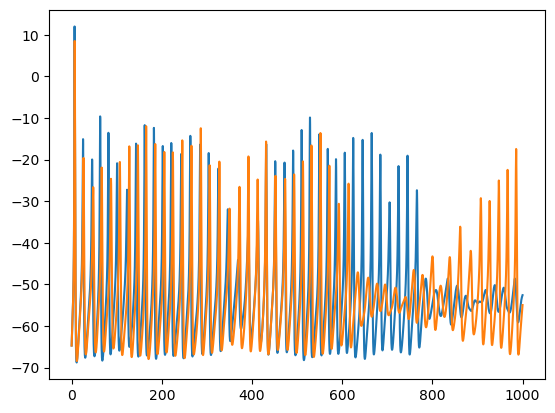

In [26]:
plt.plot(ts,Vs0)
plt.plot(ts,Vs1)
plt.show()

To make a different neuron, we just need to modify the parameter when creating it.

In [27]:
# Parameter for a cortical pyramidal neuron with parameters from
# https://neuronaldynamics.epfl.ch/online/Ch2.S2.html
# Note that the units used are not the same as the above `dayan_abbott` neuron
cortical_pyramidal = HodgkinHuxley(
    E_Na=55,g_Na=40,
    E_K=-77,g_K=35,
    E_L=-65,g_L=0.3,
    cm=1,
    alpha_n=lambda v:.02*(v-25)/(1-np.exp(-(v-25)/9)),
     beta_n=lambda v:-.002*(v-25)/(1-np.exp((v-25)/9)),
    alpha_m=lambda v:.182*(v+35)/(1-np.exp(-(v+35)/9)),
     beta_m=lambda v:-.124*(v+35)/(1-np.exp((v+35)/9)),
    alpha_h=lambda v:.25*np.exp(-(v+90)/12),
     beta_h=lambda v:.25*np.exp((v+62)/6)/np.exp((v+90)/12)
)

### Drive the model with a square-wave stimulus

## Creating square-wave stimulus

In [28]:
print(T,dt,ts)

1000 0.1 [0.000e+00 1.000e-01 2.000e-01 ... 9.997e+02 9.998e+02 9.999e+02]


In [29]:
f = lambda t:2.0*(t>100)*(t<400) # This is a square-wave function

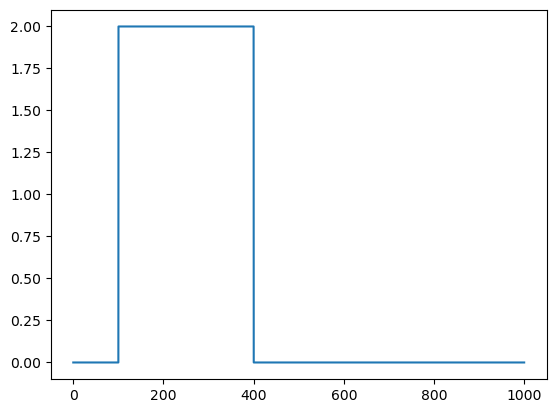

In [30]:
plt.plot(ts,f(ts))
plt.show()

## List or array variables are reference to the storage

In [31]:
a = [1,2,3,4]
c = a # `c` is referring to the same list as `a`
b = c # `b` is referring to the same list as `c`
b[1] = 100 # We modify the list through the `b` variable
print(a)
a += [5] # We grow the list through the `a` variable
print(b)
c = c+[6] # Now we create a new list
print(c)
print(a) # The original list is not modified

[1, 100, 3, 4]
[1, 100, 3, 4, 5]
[1, 100, 3, 4, 5, 6]
[1, 100, 3, 4, 5]


### Compare to variables of *immutable* types

In [32]:
a = 10
b = a
b += 1
print(a,b)

10 11


In [33]:
a = (1,2,3,4)
b = a
b += (1,)
print(a)
print(b)

(1, 2, 3, 4)
(1, 2, 3, 4, 1)


## Passing array or list to function
A variable to a list or array is a reference to the object. Be sure to heed whether you are changing the object or the reference.

In [34]:
a = np.array([1,2,3,4])
def test1(a):
    a += np.array([4,3,2,1]) # The array is modified
    return a
print(test1(a))
print(a)

[5 5 5 5]
[5 5 5 5]


In [35]:
a = np.array([1,2,3,4])
def test1(a):
    a = a+np.array([4,3,2,1]) # New array is created
    return a
print(test1(a))
print(a)

[5 5 5 5]
[1 2 3 4]


This is why we did not use increment `+=`, e.g., in our `euler_step()`.

In [36]:
a = [1,2,3,4]
def test1(a):
    for i in range(len(a)):
        a[i] += [4,3,2,1][i] # We are modifying the same list
    return a
print(test1(a))
print(a)

[5, 5, 5, 5]
[5, 5, 5, 5]


In [37]:
a = [1,2,3,4]
def test1(a):
    for i in range(len(a)):
        a[i] = a[i]+[4,3,2,1][i] # This is still modifying the same list
    return a
print(test1(a))
print(a)

[5, 5, 5, 5]
[5, 5, 5, 5]


In [38]:
a = [1,2,3,4]
def test1(a):
    # If we want to leave the original list alone, we need to create a new list
    a = [a[i]+[4,3,2,1][i] for i in range(len(a))] # Like this
    return a
print(test1(a))
print(a)

[5, 5, 5, 5]
[1, 2, 3, 4]


<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>